## Cleaning the Data

In [1]:
## Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from datetime import datetime, timedelta
from sklearn.metrics import r2_score

In [88]:
## Read CSV file
file_path = "resources/Data_Unclean.csv"
df = pd.read_csv(file_path, dtype={'RegionName': 'str'})
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,107002.0,...,248777.0,252709.0,256653.0,261312.0,266997.0,273285.0,279389.0,284432.0,287836.0,289756.0
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,223338.0,...,433465.0,439171.0,445234.0,454715.0,466332.0,480021.0,491404.0,498890.0,501155.0,499291.0
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,90849.0,...,173345.0,174972.0,176993.0,178975.0,181139.0,184519.0,188144.0,191609.0,193857.0,195569.0
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,190808.0,...,584583.0,580498.0,578641.0,578434.0,580397.0,581936.0,584782.0,587052.0,589211.0,590170.0
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,276490.0,...,746369.0,746919.0,750113.0,753406.0,759126.0,761732.0,767570.0,772860.0,778034.0,780712.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27392,77347,30657,44838,zip,OH,OH,NaN,"Ashland, OH",Ashland County,NaN,...,112473.0,114141.0,116061.0,117876.0,118546.0,119022.0,120084.0,121660.0,123089.0,124495.0
27393,82834,30657,56384,zip,MN,MN,Upsala,NaN,Morrison County,NaN,...,144147.0,146052.0,148070.0,149418.0,149502.0,149604.0,150585.0,152189.0,153815.0,155308.0
27394,62723,30657,12752,zip,NY,NY,Lake Huntington,NaN,Sullivan County,NaN,...,227094.0,227325.0,228729.0,232828.0,236783.0,241034.0,250287.0,261686.0,274855.0,285462.0
27395,99923,30657,98623,zip,WA,WA,White Salmon,NaN,Klickitat County,NaN,...,623433.0,631010.0,639632.0,648672.0,654526.0,660960.0,668833.0,679623.0,686072.0,694357.0


In [89]:
df.dtypes

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
               ...   
2022-04-30    float64
2022-05-31    float64
2022-06-30    float64
2022-07-31    float64
2022-08-31    float64
Length: 281, dtype: object

In [90]:
df['Statestr'] = df['State'].astype('string')

In [91]:
df.dtypes

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
               ...   
2022-05-31    float64
2022-06-30    float64
2022-07-31    float64
2022-08-31    float64
Statestr       string
Length: 282, dtype: object

In [92]:
df.drop(df[(df['Statestr'] != 'TX')].index, axis=0,inplace=True)

In [93]:
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,Statestr
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,107002.0,...,252709.0,256653.0,261312.0,266997.0,273285.0,279389.0,284432.0,287836.0,289756.0,TX
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,223338.0,...,439171.0,445234.0,454715.0,466332.0,480021.0,491404.0,498890.0,501155.0,499291.0,TX
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,90849.0,...,174972.0,176993.0,178975.0,181139.0,184519.0,188144.0,191609.0,193857.0,195569.0,TX
7,91733,7,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,106614.0,...,249483.0,252913.0,257067.0,262316.0,268096.0,273603.0,277991.0,280897.0,282555.0,TX
17,92593,17,78660,zip,TX,TX,Pflugerville,"Austin-Round Rock-Georgetown, TX",Travis County,162156.0,...,458803.0,469077.0,481480.0,492874.0,502647.0,509584.0,505334.0,495371.0,482984.0,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27353,90734,30657,75157,zip,TX,TX,NaN,"Dallas-Fort Worth-Arlington, TX",Kaufman County,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,218336.0,218809.0,215415.0,TX
27371,91947,30657,77456,zip,TX,TX,Markham,"Bay City, TX",Matagorda County,NaN,...,142715.0,145394.0,148631.0,149743.0,151631.0,152751.0,155738.0,158667.0,160958.0,TX
27374,91878,30657,77367,zip,TX,TX,Riverside,"Huntsville, TX",Walker County,NaN,...,195092.0,201323.0,208821.0,210444.0,212385.0,212856.0,216006.0,219116.0,222431.0,TX
27381,91496,30657,76623,zip,TX,TX,NaN,"Dallas-Fort Worth-Arlington, TX",Ellis County,NaN,...,212758.0,222660.0,233771.0,243527.0,249353.0,250802.0,252834.0,257223.0,263159.0,TX


In [94]:
df=df.drop(['RegionID','SizeRank','RegionType','StateName','State','City','Metro','CountyName','Statestr'], axis=1)

In [95]:
# Set RegionName as index 
df1 = df.set_index('RegionName')

# Transpose and set index label to Date
df1 = df1.transpose().rename_axis(None, axis=1).rename_axis("Date", axis=0)
df1

,77449,77494,79936,77084,78660,78521,75052,77433,77479,77573,...,79366,77614,77878,77369,78351,75157,77456,77367,76623,77623
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,107002.0,223338.0,90849.0,106614.0,162156.0,NaN,113679.0,180023.0,237597.0,NaN,...,170157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,107015.0,223655.0,90849.0,106559.0,162614.0,NaN,113835.0,180141.0,238554.0,NaN,...,168913.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,106817.0,224374.0,90882.0,106301.0,162810.0,NaN,113948.0,179831.0,239507.0,NaN,...,168487.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-30,106822.0,225594.0,90848.0,106249.0,163328.0,NaN,114184.0,179950.0,241449.0,NaN,...,168041.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-31,106853.0,225159.0,90868.0,106214.0,163675.0,NaN,114429.0,179818.0,242161.0,NaN,...,167954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,273285.0,480021.0,184519.0,268096.0,502647.0,139935.0,335833.0,402649.0,509862.0,370766.0,...,369284.0,105944.0,222136.0,115066.0,94021.0,NaN,151631.0,212385.0,249353.0,245929.0
2022-05-31,279389.0,491404.0,188144.0,273603.0,509584.0,141664.0,344092.0,412013.0,520541.0,376368.0,...,374712.0,105329.0,222692.0,116414.0,95693.0,NaN,152751.0,212856.0,250802.0,255571.0
2022-06-30,284432.0,498890.0,191609.0,277991.0,505334.0,144128.0,351060.0,419870.0,526923.0,379626.0,...,378019.0,107338.0,226008.0,118526.0,94486.0,218336.0,155738.0,216006.0,252834.0,263578.0


In [96]:
df1 = df1.dropna(axis=1)
df1

,77449,77494,79936,77084,78660,77479,77429,75217,77584,77379,...,75246,78742,77417,78152,77534,77873,77444,77046,77464,77476
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,107002.0,223338.0,90849.0,106614.0,162156.0,237597.0,162149.0,70761.0,173387.0,168755.0,...,132633.0,115005.0,110935.0,130477.0,91467.0,138760.0,113315.0,208217.0,190359.0,219063.0
2000-02-29,107015.0,223655.0,90849.0,106559.0,162614.0,238554.0,162038.0,70924.0,173869.0,168741.0,...,133152.0,115269.0,110810.0,131608.0,91741.0,140062.0,113063.0,207768.0,192138.0,220646.0
2000-03-31,106817.0,224374.0,90882.0,106301.0,162810.0,239507.0,161740.0,70913.0,174256.0,168473.0,...,134439.0,114676.0,110604.0,132040.0,91658.0,140856.0,112895.0,205635.0,195121.0,218306.0
2000-04-30,106822.0,225594.0,90848.0,106249.0,163328.0,241449.0,161732.0,71083.0,175158.0,168683.0,...,134984.0,113913.0,110701.0,132628.0,91854.0,141111.0,113150.0,202675.0,200202.0,216508.0
2000-05-31,106853.0,225159.0,90868.0,106214.0,163675.0,242161.0,161787.0,71157.0,176019.0,168991.0,...,134142.0,112561.0,110444.0,132123.0,92225.0,140032.0,112565.0,200162.0,203636.0,212277.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,273285.0,480021.0,184519.0,268096.0,502647.0,509862.0,363840.0,217146.0,362259.0,358003.0,...,372382.0,432786.0,254787.0,376435.0,257012.0,395242.0,275938.0,341963.0,315907.0,410628.0
2022-05-31,279389.0,491404.0,188144.0,273603.0,509584.0,520541.0,371762.0,222399.0,368709.0,365204.0,...,378179.0,439025.0,259659.0,379968.0,261677.0,397600.0,279804.0,346886.0,323898.0,416218.0
2022-06-30,284432.0,498890.0,191609.0,277991.0,505334.0,526923.0,378324.0,227489.0,373389.0,370661.0,...,382940.0,435275.0,262033.0,378320.0,264029.0,403756.0,286658.0,349098.0,321533.0,417235.0


In [116]:
df1.to_csv('clean_data.csv')

## Importing Clean data

In [2]:
## Read CSV file
url = 'https://raw.githubusercontent.com/mhenson1989/group_one_project/main/clean_data.csv'
clean_data = pd.read_csv(url)
clean_data

,Date,77449,77494,79936,77084,78660,77479,77429,75217,77584,...,75246,78742,77417,78152,77534,77873,77444,77046,77464,77476
0,2000-01-31,107002.0,223338.0,90849.0,106614.0,162156.0,237597.0,162149.0,70761.0,173387.0,...,132633.0,115005.0,110935.0,130477.0,91467.0,138760.0,113315.0,208217.0,190359.0,219063.0
1,2000-02-29,107015.0,223655.0,90849.0,106559.0,162614.0,238554.0,162038.0,70924.0,173869.0,...,133152.0,115269.0,110810.0,131608.0,91741.0,140062.0,113063.0,207768.0,192138.0,220646.0
2,2000-03-31,106817.0,224374.0,90882.0,106301.0,162810.0,239507.0,161740.0,70913.0,174256.0,...,134439.0,114676.0,110604.0,132040.0,91658.0,140856.0,112895.0,205635.0,195121.0,218306.0
3,2000-04-30,106822.0,225594.0,90848.0,106249.0,163328.0,241449.0,161732.0,71083.0,175158.0,...,134984.0,113913.0,110701.0,132628.0,91854.0,141111.0,113150.0,202675.0,200202.0,216508.0
4,2000-05-31,106853.0,225159.0,90868.0,106214.0,163675.0,242161.0,161787.0,71157.0,176019.0,...,134142.0,112561.0,110444.0,132123.0,92225.0,140032.0,112565.0,200162.0,203636.0,212277.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2022-04-30,273285.0,480021.0,184519.0,268096.0,502647.0,509862.0,363840.0,217146.0,362259.0,...,372382.0,432786.0,254787.0,376435.0,257012.0,395242.0,275938.0,341963.0,315907.0,410628.0
268,2022-05-31,279389.0,491404.0,188144.0,273603.0,509584.0,520541.0,371762.0,222399.0,368709.0,...,378179.0,439025.0,259659.0,379968.0,261677.0,397600.0,279804.0,346886.0,323898.0,416218.0
269,2022-06-30,284432.0,498890.0,191609.0,277991.0,505334.0,526923.0,378324.0,227489.0,373389.0,...,382940.0,435275.0,262033.0,378320.0,264029.0,403756.0,286658.0,349098.0,321533.0,417235.0
270,2022-07-31,287836.0,501155.0,193857.0,280897.0,495371.0,528295.0,382860.0,230092.0,376621.0,...,384114.0,427681.0,261369.0,379071.0,265880.0,410528.0,291269.0,351382.0,317844.0,416401.0


In [3]:
# Checking data types
clean_data.dtypes

Date      object
77449    float64
77494    float64
79936    float64
77084    float64
          ...   
77873    float64
77444    float64
77046    float64
77464    float64
77476    float64
Length: 465, dtype: object

In [4]:
# Converting Date column dtype from object to datetime values
clean_data['Date'] = pd.to_datetime(clean_data['Date'])

In [5]:
# # Set Date column as Index 
clean_data = clean_data.set_index('Date')
clean_data

,77449,77494,79936,77084,78660,77479,77429,75217,77584,77379,...,75246,78742,77417,78152,77534,77873,77444,77046,77464,77476
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,107002.0,223338.0,90849.0,106614.0,162156.0,237597.0,162149.0,70761.0,173387.0,168755.0,...,132633.0,115005.0,110935.0,130477.0,91467.0,138760.0,113315.0,208217.0,190359.0,219063.0
2000-02-29,107015.0,223655.0,90849.0,106559.0,162614.0,238554.0,162038.0,70924.0,173869.0,168741.0,...,133152.0,115269.0,110810.0,131608.0,91741.0,140062.0,113063.0,207768.0,192138.0,220646.0
2000-03-31,106817.0,224374.0,90882.0,106301.0,162810.0,239507.0,161740.0,70913.0,174256.0,168473.0,...,134439.0,114676.0,110604.0,132040.0,91658.0,140856.0,112895.0,205635.0,195121.0,218306.0
2000-04-30,106822.0,225594.0,90848.0,106249.0,163328.0,241449.0,161732.0,71083.0,175158.0,168683.0,...,134984.0,113913.0,110701.0,132628.0,91854.0,141111.0,113150.0,202675.0,200202.0,216508.0
2000-05-31,106853.0,225159.0,90868.0,106214.0,163675.0,242161.0,161787.0,71157.0,176019.0,168991.0,...,134142.0,112561.0,110444.0,132123.0,92225.0,140032.0,112565.0,200162.0,203636.0,212277.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,273285.0,480021.0,184519.0,268096.0,502647.0,509862.0,363840.0,217146.0,362259.0,358003.0,...,372382.0,432786.0,254787.0,376435.0,257012.0,395242.0,275938.0,341963.0,315907.0,410628.0
2022-05-31,279389.0,491404.0,188144.0,273603.0,509584.0,520541.0,371762.0,222399.0,368709.0,365204.0,...,378179.0,439025.0,259659.0,379968.0,261677.0,397600.0,279804.0,346886.0,323898.0,416218.0
2022-06-30,284432.0,498890.0,191609.0,277991.0,505334.0,526923.0,378324.0,227489.0,373389.0,370661.0,...,382940.0,435275.0,262033.0,378320.0,264029.0,403756.0,286658.0,349098.0,321533.0,417235.0


## Plotting Data for each zip code

<Figure size 8000x4000 with 0 Axes>

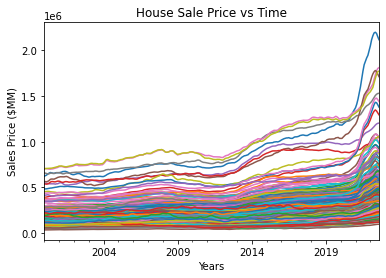

In [19]:
# Visualizing The House Sales Price by zip code
# Set the plot size
plt.figure(figsize=(16, 8), dpi=500)
  
# using .plot method to plot House Sales Price.
clean_data.plot(label='clean_data')
  
# adding title
plt.title('House Sale Price vs Time')
  
# adding label to x-axis
plt.xlabel('Years')

# adding label to y-axis
plt.ylabel('Sales Price ($MM)')
  
# adding legend.
plt.legend('', frameon=False)

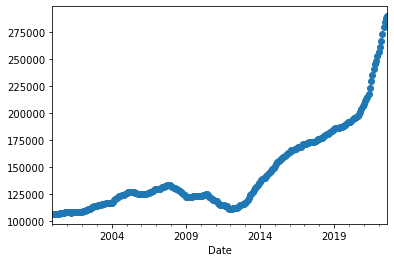

In [20]:
# Visualizing The House Sales Price for only 77449 Zip Code
  
# using .plot method to plot House Sales Price.
clean_data['77449'].plot(marker='o', ls='')

plt.show()

# Machine Learning - Linear Regression

### Testing Linear Regression Model for 1 zip code

In [21]:
# Reshaping the X (corresponding dates to Sale Price) into an array. All dates are passed through pandas 
#‘to_datetime()’ function to convert it to float numeric for regression purpose. index.values is chained since dates
# is the index of the dataframe
X = np.array(pd.to_datetime(clean_data['77449']).index.values, dtype=float).reshape(-1, 1)
X

array([[9.4927680e+17],
       [9.5178240e+17],
       [9.5446080e+17],
       [9.5705280e+17],
       [9.5973120e+17],
       [9.6232320e+17],
       [9.6500160e+17],
       [9.6768000e+17],
       [9.7027200e+17],
       [9.7295040e+17],
       [9.7554240e+17],
       [9.7822080e+17],
       [9.8089920e+17],
       [9.8331840e+17],
       [9.8599680e+17],
       [9.8858880e+17],
       [9.9126720e+17],
       [9.9385920e+17],
       [9.9653760e+17],
       [9.9921600e+17],
       [1.0018080e+18],
       [1.0044864e+18],
       [1.0070784e+18],
       [1.0097568e+18],
       [1.0124352e+18],
       [1.0148544e+18],
       [1.0175328e+18],
       [1.0201248e+18],
       [1.0228032e+18],
       [1.0253952e+18],
       [1.0280736e+18],
       [1.0307520e+18],
       [1.0333440e+18],
       [1.0360224e+18],
       [1.0386144e+18],
       [1.0412928e+18],
       [1.0439712e+18],
       [1.0463904e+18],
       [1.0490688e+18],
       [1.0516608e+18],
       [1.0543392e+18],
       [1.056931

In [22]:
# The shape of X is 272 samples, with a single feature (column)
X.shape

(272, 1)

In [23]:
# The y variable is the Sales Price for 77449 zip code
y = np.array(clean_data['77449'].values)
y

array([107002., 107015., 106817., 106822., 106853., 107066., 107220.,
       107449., 107831., 108066., 108520., 108923., 108978., 108782.,
       108252., 108068., 108128., 108285., 108430., 108202., 108242.,
       108397., 108681., 108792., 108913., 109089., 109664., 110260.,
       110790., 111182., 111674., 112366., 112975., 113504., 113840.,
       114163., 114439., 114658., 114989., 115315., 115729., 116006.,
       116259., 116483., 116627., 116765., 116735., 116806., 117051.,
       118091., 119731., 120882., 121970., 122115., 123088., 123450.,
       124020., 124218., 124745., 125551., 126340., 126915., 127216.,
       127366., 127158., 127054., 126794., 126547., 126124., 125637.,
       125525., 125343., 125370., 125130., 125187., 125169., 125517.,
       125916., 126395., 126889., 127404., 128325., 128976., 129789.,
       129939., 129864., 129511., 129829., 130510., 131298., 131753.,
       132310., 132809., 133153., 133235., 133145., 132397., 131527.,
       130746., 1304

In [24]:
# Create linear regression model with scikit-learn
model = LinearRegression()

In [25]:
# Fit data into the model
model.fit(X, y)

LinearRegression()

In [26]:
# The model creates predicted y values based on X values
y_pred = model.predict(X)
print(y_pred.shape)

(272,)


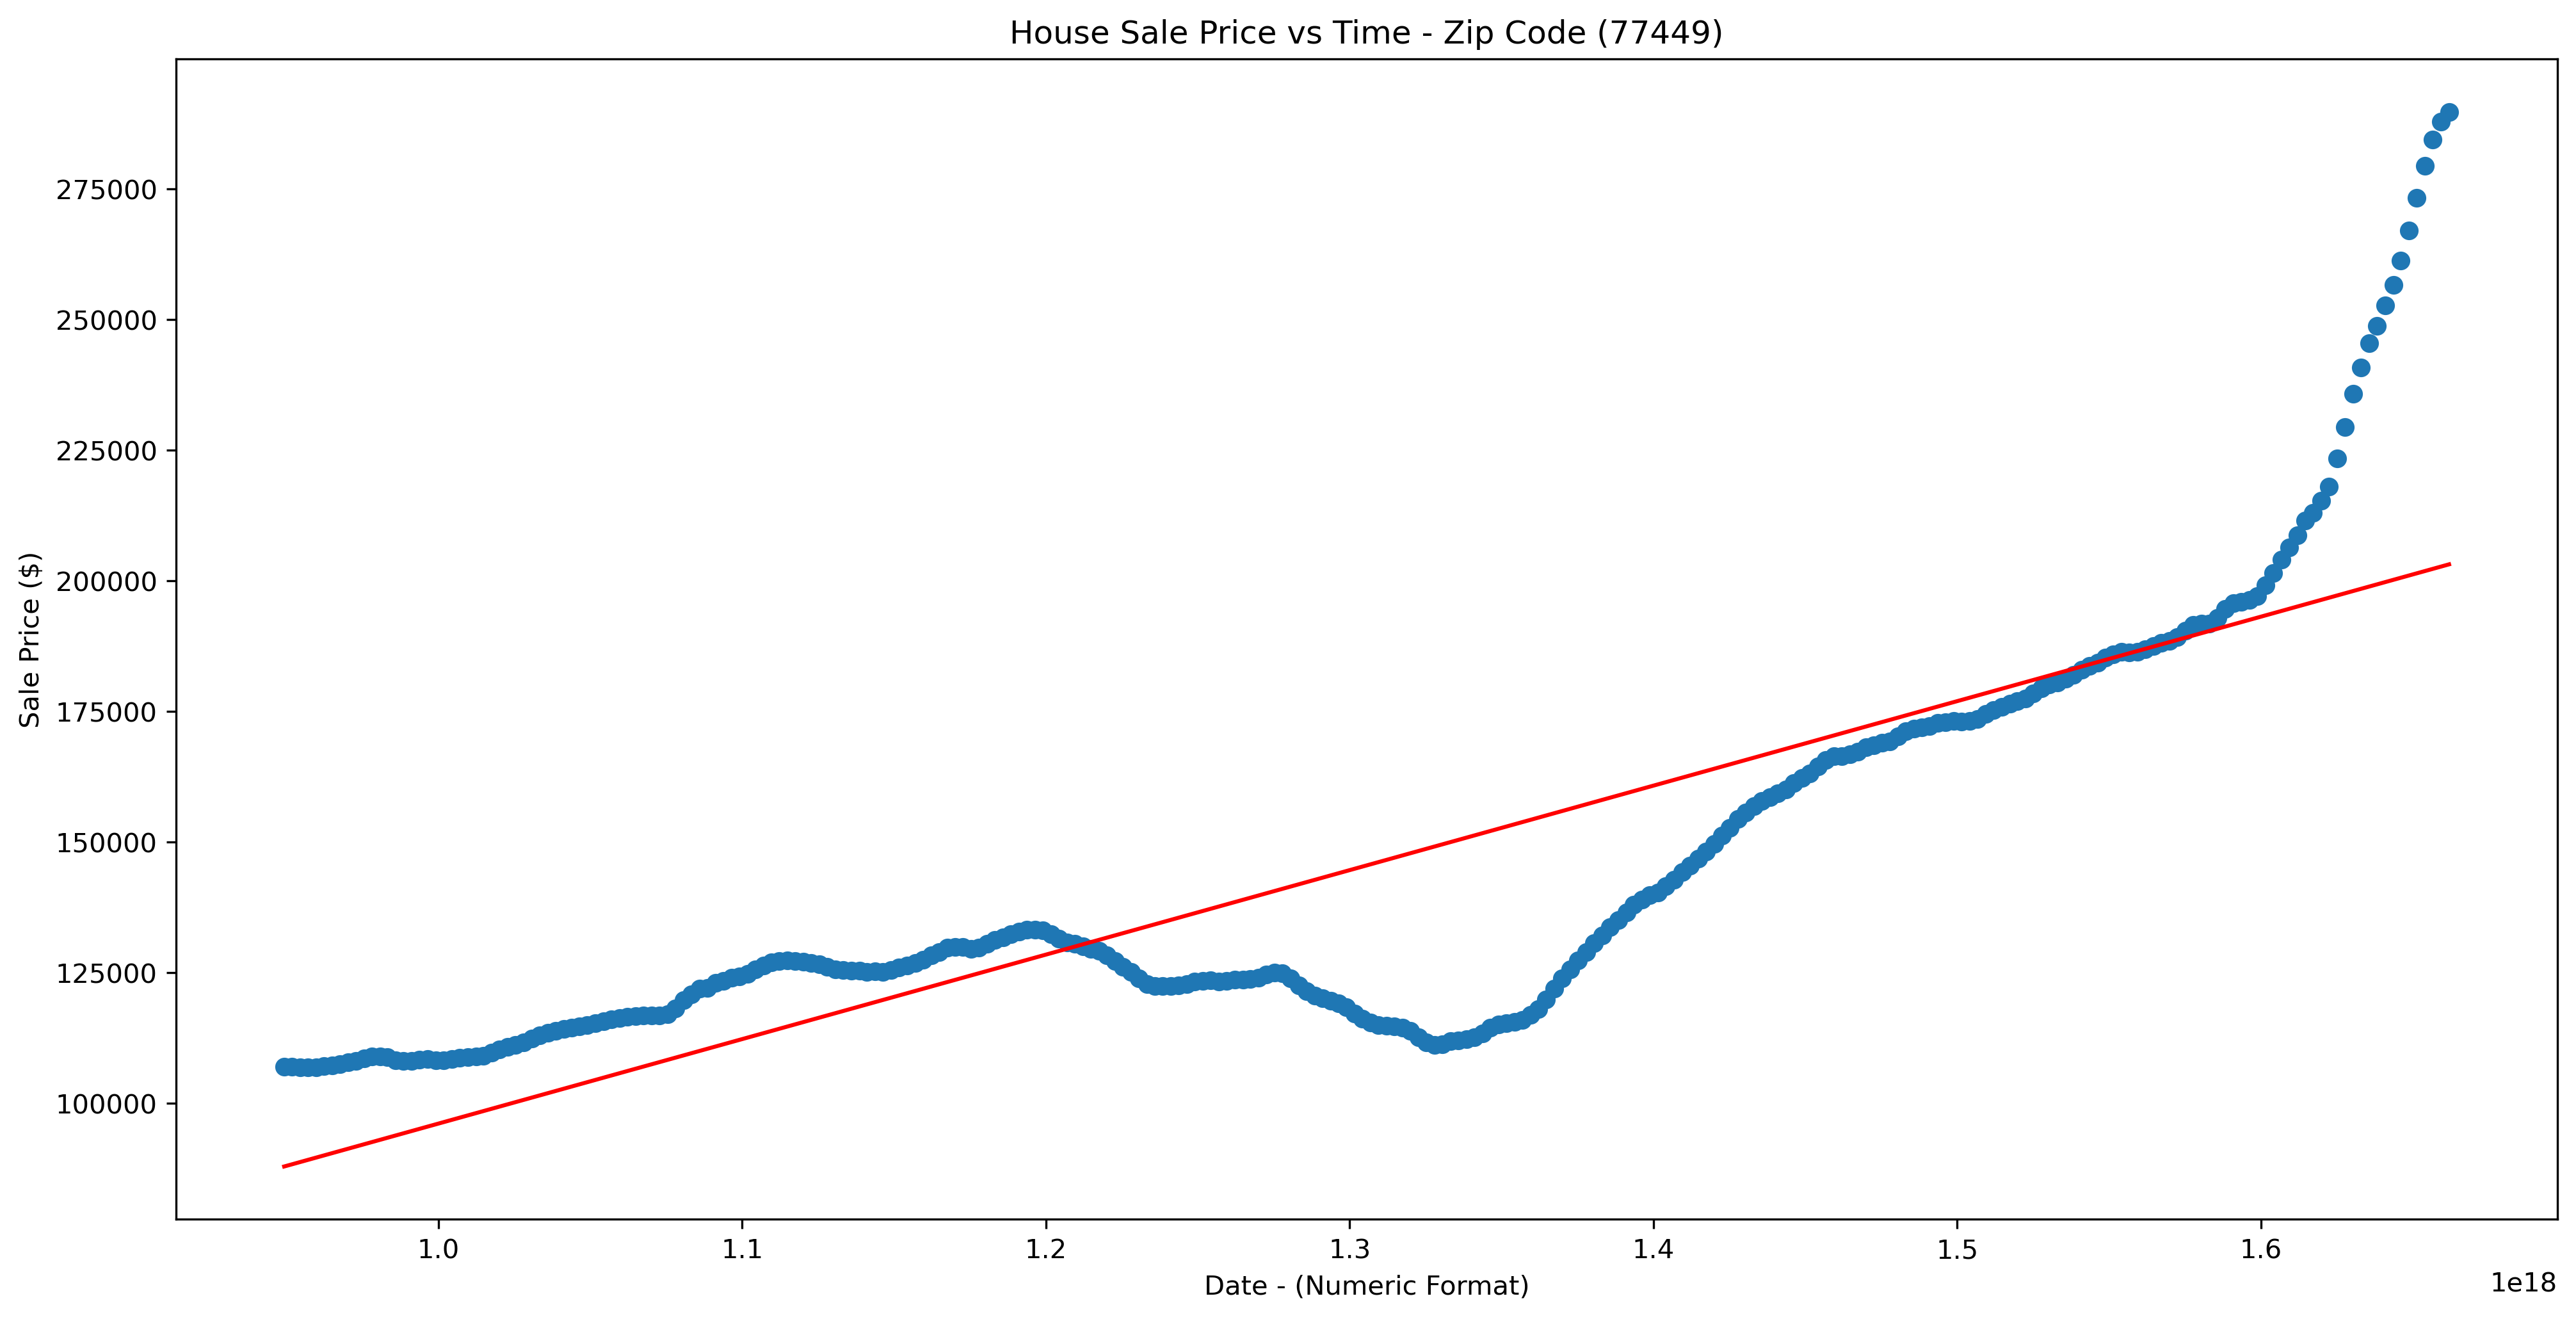

Slope: [1.6172174e-13]
Intercept: -65630.33371319325
R2 score: 0.7109630933502231


In [29]:
# Plotting the results
plt.figure(figsize=(16, 8), dpi=300)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title('House Sale Price vs Time - Zip Code (77449)')
plt.xlabel('Date - (Numeric Format)')
plt.ylabel('Sale Price ($)')
plt.show()

print('Slope:', model.coef_)
print('Intercept:', model.intercept_)
print('R2 score:', r2_score(y, y_pred))

### Testing Linear Regression Model for 3 zip codes with a for loop

In [15]:
# slice dataframe for 3 columns only
clean_data_3zipcodes = clean_data[["77449", "77494", "79936"]].copy() 
clean_data_3zipcodes.head()

,77449,77494,79936
Date,,,
2000-01-31,107002.0,223338.0,90849.0
2000-02-29,107015.0,223655.0,90849.0
2000-03-31,106817.0,224374.0,90882.0
2000-04-30,106822.0,225594.0,90848.0
2000-05-31,106853.0,225159.0,90868.0


In [16]:
# For loop to go over each column in dataframe
for column in clean_data_3zipcodes:
    #print(df[column])
    y = np.array(clean_data_3zipcodes[column].values)
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    #print(y_pred.shape)
    #plt.scatter(X, y)
    #plt.plot(X, y_pred, color='red')
    #plt.show()
    
    print('Slope:', model.coef_)
    print('Intercept:', model.intercept_)
    print('R2 score:', r2_score(y, y_pred))

Slope: [1.6172174e-13]
Intercept: -65630.33371319325
R2 score: 0.7109630933502231
Slope: [2.52066042e-13]
Intercept: -39470.80914721411
R2 score: 0.8177118912466564
Slope: [8.75001809e-14]
Intercept: 5645.012460797749
R2 score: 0.6931723746105816


In [17]:
# Dictionary to store slope and intercept of each linear regression corresponding to each zip code
zip_code = {}

# For loop to go over each column in dataframe
for column in clean_data_3zipcodes:
    y = np.array(clean_data_3zipcodes[column].values)
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    slope = model.coef_
    intercept = model.intercept_
    r2 = r2_score(y, y_pred)
    
    zip_code[column] = [slope[0], intercept]
    
zip_code

{'77449': [1.6172173958750464e-13, -65630.33371319325],
 '77494': [2.5206604249559004e-13, -39470.80914721411],
 '79936': [8.750018093341218e-14, 5645.012460797749]}

In [18]:
# Slope and Intercept Dataframe
slope_intercept_df = pd.DataFrame(zip_code).transpose().reset_index()
slope_intercept_df.columns = ["zip codes", "slope", "intercept"]
slope_intercept_df

,zip codes,slope,intercept
0,77449,1.617217e-13,-65630.333713
1,77494,2.520660e-13,-39470.809147
2,79936,8.750018e-14,5645.012461


### Linear Regression Model for All Zip Codes

In [19]:
# Dictionary to store slope and intercept of each linear regression corresponding to each zip code
all_zip_code = {}

# For loop to go over each column in dataframe
for column in clean_data:
    y = np.array(clean_data[column].values)
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    slope = model.coef_
    intercept = model.intercept_
    r2 = r2_score(y, y_pred)
    
    all_zip_code[column] = [slope[0], intercept]
    
all_zip_code

{'77449': [1.6172173958750464e-13, -65630.33371319325],
 '77494': [2.5206604249559004e-13, -39470.80914721411],
 '79936': [8.750018093341218e-14, 5645.012460797749],
 '77084': [1.5771226569833691e-13, -60454.764026009856],
 '78660': [2.6965667191861447e-13, -137170.8642405064],
 '77479': [2.924419345351436e-13, -61980.2389619305],
 '77429': [2.0669413517679789e-13, -56666.14260071065],
 '75217': [1.1312416041042088e-13, -51564.043566666674],
 '77584': [1.9437883399755044e-13, -30430.09592696739],
 '77379': [1.9237141991532883e-13, -34612.99979861776],
 '75211': [1.5480592853661474e-13, -84877.60690906263],
 '79938': [7.990830037136567e-14, 46217.89293578989],
 '79912': [1.237707949241566e-13, 16232.901218952844],
 '78641': [3.0049527648218066e-13, -148090.46142087068],
 '78613': [3.643778244136289e-13, -220441.1504049346],
 '78245': [1.5424783198756552e-13, -47665.467895241425],
 '77083': [1.4677632674839709e-13, -48409.175953589554],
 '75002': [2.994544061012968e-13, -156943.281187044

In [20]:
# Slope and Intercept Dataframe
all_slope_intercept_df = pd.DataFrame(all_zip_code).transpose().reset_index()
all_slope_intercept_df.columns = ["zip codes", "slope", "intercept"]
all_slope_intercept_df

,zip codes,slope,intercept
0,77449,1.617217e-13,-65630.333713
1,77494,2.520660e-13,-39470.809147
2,79936,8.750018e-14,5645.012461
3,77084,1.577123e-13,-60454.764026
4,78660,2.696567e-13,-137170.864241
...,...,...,...
459,77873,2.764279e-13,-157826.867213
460,77444,1.268990e-13,-11384.048976
461,77046,2.335417e-13,-60592.185438
462,77464,7.120255e-14,100271.583393


In [121]:
all_slope_intercept_df.to_csv('slope_intercept.csv', index=False)

# Converting Clean Dataframe for Tableau Visualizations

In [4]:
## Import libraries
import pandas as pd

In [5]:
## Read CSV file
url = 'https://raw.githubusercontent.com/mhenson1989/group_one_project/main/clean_data.csv'
clean_data = pd.read_csv(url, index_col = False)
clean_data

,Date,77449,77494,79936,77084,78660,77479,77429,75217,77584,...,75246,78742,77417,78152,77534,77873,77444,77046,77464,77476
0,2000-01-31,107002.0,223338.0,90849.0,106614.0,162156.0,237597.0,162149.0,70761.0,173387.0,...,132633.0,115005.0,110935.0,130477.0,91467.0,138760.0,113315.0,208217.0,190359.0,219063.0
1,2000-02-29,107015.0,223655.0,90849.0,106559.0,162614.0,238554.0,162038.0,70924.0,173869.0,...,133152.0,115269.0,110810.0,131608.0,91741.0,140062.0,113063.0,207768.0,192138.0,220646.0
2,2000-03-31,106817.0,224374.0,90882.0,106301.0,162810.0,239507.0,161740.0,70913.0,174256.0,...,134439.0,114676.0,110604.0,132040.0,91658.0,140856.0,112895.0,205635.0,195121.0,218306.0
3,2000-04-30,106822.0,225594.0,90848.0,106249.0,163328.0,241449.0,161732.0,71083.0,175158.0,...,134984.0,113913.0,110701.0,132628.0,91854.0,141111.0,113150.0,202675.0,200202.0,216508.0
4,2000-05-31,106853.0,225159.0,90868.0,106214.0,163675.0,242161.0,161787.0,71157.0,176019.0,...,134142.0,112561.0,110444.0,132123.0,92225.0,140032.0,112565.0,200162.0,203636.0,212277.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2022-04-30,273285.0,480021.0,184519.0,268096.0,502647.0,509862.0,363840.0,217146.0,362259.0,...,372382.0,432786.0,254787.0,376435.0,257012.0,395242.0,275938.0,341963.0,315907.0,410628.0
268,2022-05-31,279389.0,491404.0,188144.0,273603.0,509584.0,520541.0,371762.0,222399.0,368709.0,...,378179.0,439025.0,259659.0,379968.0,261677.0,397600.0,279804.0,346886.0,323898.0,416218.0
269,2022-06-30,284432.0,498890.0,191609.0,277991.0,505334.0,526923.0,378324.0,227489.0,373389.0,...,382940.0,435275.0,262033.0,378320.0,264029.0,403756.0,286658.0,349098.0,321533.0,417235.0
270,2022-07-31,287836.0,501155.0,193857.0,280897.0,495371.0,528295.0,382860.0,230092.0,376621.0,...,384114.0,427681.0,261369.0,379071.0,265880.0,410528.0,291269.0,351382.0,317844.0,416401.0


In [6]:
clean_data_tab = clean_data.set_index('Date')

In [7]:
# Transpose and set index label to Zip_Code
data_tableau = clean_data_tab.transpose().rename_axis('Zip_Code', axis=1)
data_tableau

Zip_Code,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31
77449,107002.0,107015.0,106817.0,106822.0,106853.0,107066.0,107220.0,107449.0,107831.0,108066.0,...,248777.0,252709.0,256653.0,261312.0,266997.0,273285.0,279389.0,284432.0,287836.0,289756.0
77494,223338.0,223655.0,224374.0,225594.0,225159.0,224825.0,223712.0,224052.0,223656.0,224325.0,...,433465.0,439171.0,445234.0,454715.0,466332.0,480021.0,491404.0,498890.0,501155.0,499291.0
79936,90849.0,90849.0,90882.0,90848.0,90868.0,90827.0,90813.0,90765.0,90232.0,89596.0,...,173345.0,174972.0,176993.0,178975.0,181139.0,184519.0,188144.0,191609.0,193857.0,195569.0
77084,106614.0,106559.0,106301.0,106249.0,106214.0,106382.0,106422.0,106608.0,107009.0,107337.0,...,245999.0,249483.0,252913.0,257067.0,262316.0,268096.0,273603.0,277991.0,280897.0,282555.0
78660,162156.0,162614.0,162810.0,163328.0,163675.0,164035.0,163925.0,164104.0,164240.0,164920.0,...,447053.0,458803.0,469077.0,481480.0,492874.0,502647.0,509584.0,505334.0,495371.0,482984.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77873,138760.0,140062.0,140856.0,141111.0,140032.0,137491.0,135358.0,133486.0,131901.0,130759.0,...,358067.0,368112.0,375304.0,385624.0,390054.0,395242.0,397600.0,403756.0,410528.0,417516.0
77444,113315.0,113063.0,112895.0,113150.0,112565.0,112416.0,111332.0,110828.0,109554.0,109407.0,...,245860.0,250923.0,257861.0,264748.0,270633.0,275938.0,279804.0,286658.0,291269.0,290765.0
77046,208217.0,207768.0,205635.0,202675.0,200162.0,194524.0,193560.0,192489.0,195371.0,192894.0,...,332338.0,333990.0,337446.0,338476.0,340595.0,341963.0,346886.0,349098.0,351382.0,351022.0
77464,190359.0,192138.0,195121.0,200202.0,203636.0,204359.0,205382.0,205847.0,207405.0,208354.0,...,268291.0,272121.0,277811.0,289314.0,303471.0,315907.0,323898.0,321533.0,317844.0,310646.0


In [8]:
# Convert Dataframe to CSV
data_tableau.to_csv('tableau_clean.csv', index=True, header=True)

## Linear Regression Model w/o Covid Pandemic

In [114]:
# Setting and creating new dataframe. Removing COVID data, to understand Covid impact on House Sales Price predictions
clean_data_nocovid = clean_data['2000-1-31' :'2020-2-29']
clean_data_nocovid

,77449,77494,79936,77084,78660,77479,77429,75217,77584,77379,...,75246,78742,77417,78152,77534,77873,77444,77046,77464,77476
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,107002.0,223338.0,90849.0,106614.0,162156.0,237597.0,162149.0,70761.0,173387.0,168755.0,...,132633.0,115005.0,110935.0,130477.0,91467.0,138760.0,113315.0,208217.0,190359.0,219063.0
2000-02-29,107015.0,223655.0,90849.0,106559.0,162614.0,238554.0,162038.0,70924.0,173869.0,168741.0,...,133152.0,115269.0,110810.0,131608.0,91741.0,140062.0,113063.0,207768.0,192138.0,220646.0
2000-03-31,106817.0,224374.0,90882.0,106301.0,162810.0,239507.0,161740.0,70913.0,174256.0,168473.0,...,134439.0,114676.0,110604.0,132040.0,91658.0,140856.0,112895.0,205635.0,195121.0,218306.0
2000-04-30,106822.0,225594.0,90848.0,106249.0,163328.0,241449.0,161732.0,71083.0,175158.0,168683.0,...,134984.0,113913.0,110701.0,132628.0,91854.0,141111.0,113150.0,202675.0,200202.0,216508.0
2000-05-31,106853.0,225159.0,90868.0,106214.0,163675.0,242161.0,161787.0,71157.0,176019.0,168991.0,...,134142.0,112561.0,110444.0,132123.0,92225.0,140032.0,112565.0,200162.0,203636.0,212277.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-31,189175.0,336619.0,134994.0,187870.0,268621.0,376252.0,261867.0,143025.0,277381.0,263000.0,...,299597.0,251532.0,173048.0,261962.0,195096.0,288141.0,188323.0,308628.0,215715.0,298005.0
2019-11-30,190419.0,336954.0,134516.0,188897.0,269990.0,377084.0,263095.0,141794.0,278424.0,263947.0,...,303505.0,251834.0,174216.0,263283.0,194580.0,286516.0,190127.0,312797.0,217552.0,298630.0
2019-12-31,191560.0,336672.0,134847.0,189830.0,271343.0,377350.0,263791.0,140121.0,279179.0,264712.0,...,306171.0,248968.0,176114.0,263093.0,194249.0,284683.0,188120.0,316980.0,218644.0,296673.0


In [115]:
# Reshaping the X (corresponding dates to Sale Price) into an array. All dates are passed through pandas 
#‘to_datetime()’ function to convert it to float numeric for regression purpose. index.values is chained since dates
# is the index of the dataframe
X_nocovid = np.array(pd.to_datetime(clean_data_nocovid['77449']).index.values, dtype=float).reshape(-1, 1)

# The y variable is the Sales Price for 77449 zip code
y_nocovid = np.array(clean_data_nocovid['77449'].values)

# Fit data into the model
model.fit(X_nocovid, y_nocovid)

# The model creates predicted y values based on X values
y_pred_nocovid = model.predict(X_nocovid)

In [116]:
# Creating dataframes with X (Dates) to then convert to datetime using pandas
X_nocovid_df = pd.DataFrame(X_nocovid, columns=['Dates'])
X_df = pd.DataFrame(X, columns=['Dates'])

In [117]:
#Converting Dates columns to datetime using pandas.to_datetime
X_nocovid_df['Dates'] = pd.to_datetime(X_nocovid_df['Dates'])
X_df['Dates'] = pd.to_datetime(X_df['Dates'])
X_df.head()

,Dates
0,2000-01-31
1,2000-02-29
2,2000-03-31
3,2000-04-30
4,2000-05-31


In [118]:
# Converting column from dataframe to an array to be used in the plot
X_plot = X_df['Dates'].values
X_nocovid_plot = X_nocovid_df['Dates'].values

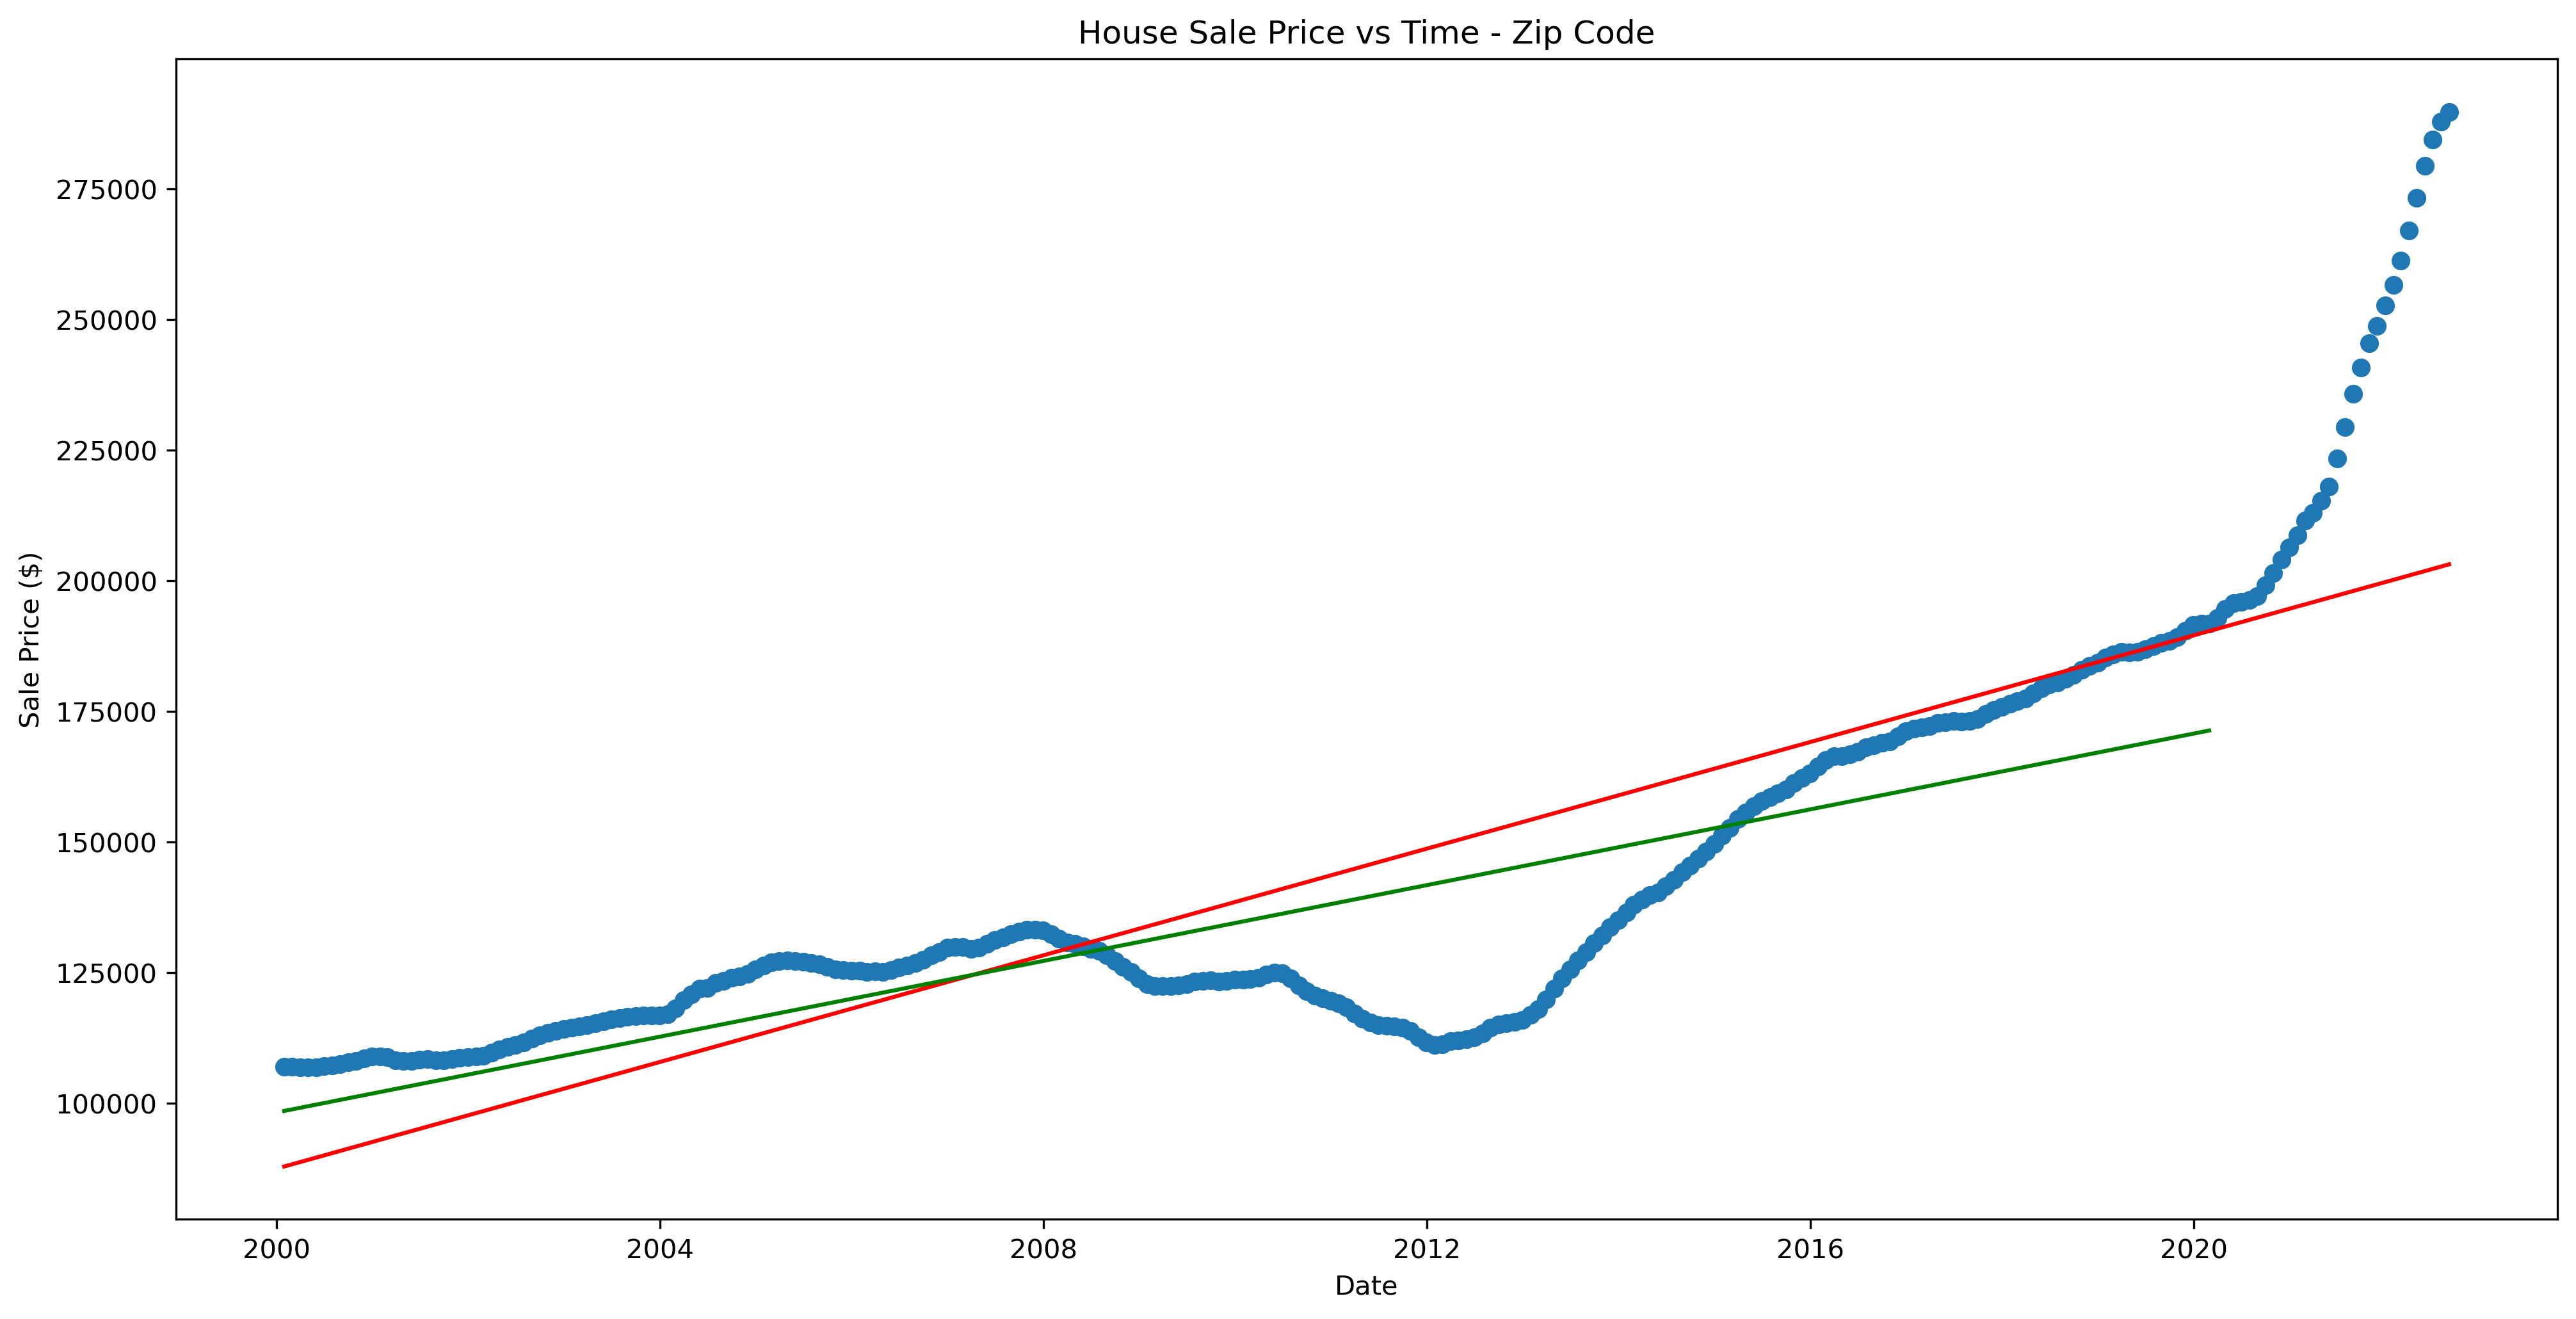

In [120]:
# Plotting the results. This is only for 1 zip code. Think about plotting several zip codes (may need 
#a for loop). 
plt.figure(figsize=(16, 8), dpi=300)
plt.scatter(X_plot, y)
plt.plot(X_plot, y_pred, color='red')
plt.plot(X_nocovid_plot, y_pred_nocovid, color='green')
plt.title('House Sale Price vs Time - Zip Code')
plt.xlabel('Date')
plt.ylabel('Sale Price ($)')
plt.show()